In [78]:
import numpy as np
import matplotlib.pyplot as plt 
from warnings import filterwarnings
filterwarnings("ignore")

# Read 

In [79]:
from tensorflow.keras.datasets import mnist

In [80]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Display images

In [81]:
clss = np.unique(y_train)

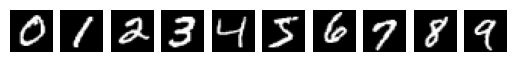

In [82]:
for cls in clss:
    imgs = X_train[y_train == cls]
    plt.subplot(1, 10, cls+1)
    plt.imshow(imgs[0], cmap="gray")
    plt.axis("off")
plt.show()

# Split

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.1, random_state=42)

# Normalization

In [84]:
X_train = X_train / 255
X_test = X_test / 255
X_val = X_val / 255

# CNN

In [26]:
X_train[29].shape

(28, 28)

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
model = Sequential()
model.add(Input(shape=(28, 28, 1))) # 1 ==> number of channels
model.add(Conv2D(3, (3, 3), activation="relu"))
model.add(MaxPooling2D((3, 3)))
model.add(Conv2D(7, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [37]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [38]:
model.fit(X_train, y_train, epochs=10, validation_data=[X_val, y_val])

Epoch 1/10
1519/1519 [==============================] - 23s 14ms/step - loss: 0.6581 - accuracy: 0.7861 - val_loss: 0.2675 - val_accuracy: 0.9170
Epoch 2/10
1519/1519 [==============================] - 20s 13ms/step - loss: 0.2181 - accuracy: 0.9341 - val_loss: 0.2063 - val_accuracy: 0.9367
Epoch 3/10
1519/1519 [==============================] - 20s 13ms/step - loss: 0.1752 - accuracy: 0.9468 - val_loss: 0.1647 - val_accuracy: 0.9493
Epoch 4/10
1519/1519 [==============================] - 20s 13ms/step - loss: 0.1529 - accuracy: 0.9531 - val_loss: 0.1524 - val_accuracy: 0.9531
Epoch 5/10
1519/1519 [==============================] - 20s 13ms/step - loss: 0.1388 - accuracy: 0.9570 - val_loss: 0.1324 - val_accuracy: 0.9591
Epoch 6/10
1519/1519 [==============================] - 21s 14ms/step - loss: 0.1285 - accuracy: 0.9604 - val_loss: 0.1301 - val_accuracy: 0.9587
Epoch 7/10
1519/1519 [==============================] - 22s 14ms/step - loss: 0.1215 - accuracy: 0.9624 - val_loss: 0.1208 -

# Apply prediction

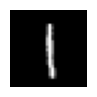

In [89]:
img = X_train[0]
plt.figure(figsize=(1, 1))
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.show()

In [92]:
img = img.reshape((1, 28, 28))
pred = model.predict(img)

1/1 [==============================] - 0s 108ms/step


In [93]:
pred.argmax()

1